# Daily Weather and Alerts for San Diego, Along with Historical Comparisons
ADS 507 Team 4\
Spring 2024\
Shailja Somani, John Vincent Deniega, & Tara Dehdari

## Notebook Setup

In [9]:
pip install nwsapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 5.9 MB/s eta 0:00:00
  Created wheel for nwsapy: filename=nwsapy-1.0.3-py3-none-any.whl size=62224 sha256=189e43fd50eac1bfbebd99bd1f629cb9a660b3d026b29d8bec4cbe955beec28e
  Stored in directory: /root/.cache/pip/wheels/21/dd/cd/e0d29f637125572afde59653ade073407eadba0bf28e49a86f
Successfully built nwsapy


In [10]:
# Package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests # For OpenWeather API
import os
import csv
from nwsapy import api_connector # For NWS API

## San Diego Weather Historical Daily Averages Dataset Analysis

### Exploratory Data Analysis

In [ ]:
weatherData = pd.read_csv("data.csv")
weatherData.head()

,Date,Min Temp (C),Min Temp M Flag,Min Temp Q Flag,Min Temp S Flag,Max Temp (C),Max Temp M Flag,Max Temp Q Flag,Max Temp S Flag,Avg Temp (C),Precipitation (mm),Precipitation M Flag,Precipitation Q Flag,Precipitation S Flag,Average Wind Speed (m/s),Average Wind Speed M Flag,Average Wind Speed Q Flag,Average Wind Speed S Flag
0,1939-07-01,17.2,NaN,NaN,0,24.4,NaN,NaN,0,20.80,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,1939-07-02,18.3,NaN,NaN,0,23.3,NaN,NaN,0,20.80,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,1939-07-03,16.7,NaN,NaN,0,21.7,NaN,NaN,0,19.20,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,1939-07-04,17.2,NaN,NaN,0,21.7,NaN,NaN,0,19.45,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,1939-07-05,17.8,NaN,NaN,0,22.2,NaN,NaN,0,20.00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [ ]:
weatherData.describe()

,Min Temp (C),Min Temp M Flag,Min Temp Q Flag,Max Temp (C),Max Temp M Flag,Max Temp Q Flag,Avg Temp (C),Precipitation (mm),Precipitation Q Flag,Average Wind Speed (m/s),Average Wind Speed M Flag,Average Wind Speed Q Flag
count,29343.000000,0.0,0.0,29343.000000,0.0,0.0,29343.000000,3318.000000,0.0,13088.000000,0.0,0.0
mean,13.821181,NaN,NaN,21.285939,NaN,NaN,17.553560,4.567963,NaN,2.232411,NaN,NaN
std,15.066915,NaN,NaN,15.085956,NaN,NaN,14.371394,39.992630,NaN,24.804047,NaN,NaN
min,-999.900000,NaN,NaN,-999.900000,NaN,NaN,-999.900000,-999.900000,NaN,-999.900000,NaN,NaN
25%,11.100000,NaN,NaN,18.900000,NaN,NaN,15.000000,0.800000,NaN,2.200000,NaN,NaN
50%,14.400000,NaN,NaN,21.100000,NaN,NaN,17.750000,2.500000,NaN,2.800000,NaN,NaN
75%,17.200000,NaN,NaN,23.900000,NaN,NaN,20.300000,7.825000,NaN,3.400000,NaN,NaN
max,25.600000,NaN,NaN,43.900000,NaN,NaN,33.350000,68.600000,NaN,9.900000,NaN,NaN


In [ ]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29343 entries, 0 to 29342
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       29343 non-null  object 
 1   Min Temp (C)               29343 non-null  float64
 2   Min Temp M Flag            0 non-null      float64
 3   Min Temp Q Flag            0 non-null      float64
 4   Min Temp S Flag            29337 non-null  object 
 5   Max Temp (C)               29343 non-null  float64
 6   Max Temp M Flag            0 non-null      float64
 7   Max Temp Q Flag            0 non-null      float64
 8   Max Temp S Flag            29337 non-null  object 
 9   Avg Temp (C)               29343 non-null  float64
 10  Precipitation (mm)         3318 non-null   float64
 11  Precipitation M Flag       2259 non-null   object 
 12  Precipitation Q Flag       0 non-null      float64
 13  Precipitation S Flag       29338 non-null  obj

In [ ]:
weatherData.shape

(29343, 18)

In [ ]:
# check for missing data
weatherData.isnull().sum()

Date                             0
Min Temp (C)                     0
Min Temp M Flag              29343
Min Temp Q Flag              29343
Min Temp S Flag                  6
Max Temp (C)                     0
Max Temp M Flag              29343
Max Temp Q Flag              29343
Max Temp S Flag                  6
Avg Temp (C)                     0
Precipitation (mm)           26025
Precipitation M Flag         27084
Precipitation Q Flag         29343
Precipitation S Flag             5
Average Wind Speed (m/s)     16255
Average Wind Speed M Flag    29343
Average Wind Speed Q Flag    29343
Average Wind Speed S Flag    16263
dtype: int64

The M flag means if we see M for a row it means that the data isn't available or not reliable. The Q flag is a quality assurance test, if blank that means it passed, and the s flag represents the source in which it got the information.

In [ ]:
# Check for duplicate rows
duplicates = weatherData.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [ ]:
# Convert date column to datetime format
weatherData['Date'] = pd.to_datetime(weatherData['Date'])


In [ ]:
# dropped quality assurance columns that passed
weatherData_cleaned = weatherData.drop(columns=['Min Temp M Flag', 'Min Temp Q Flag', 'Max Temp M Flag', 'Max Temp Q Flag', 'Average Wind Speed M Flag', 'Average Wind Speed Q Flag'])
# for now these columns were dropped because they were empty meaning that the rows had reliable data and passed the quality assurance test, for the rest i figured we can decide what to do to those rows together.
# ultimately we will be looking at the min temp, max temp, avg temp, precipitation, and average wind speed

### Looking at Histograms

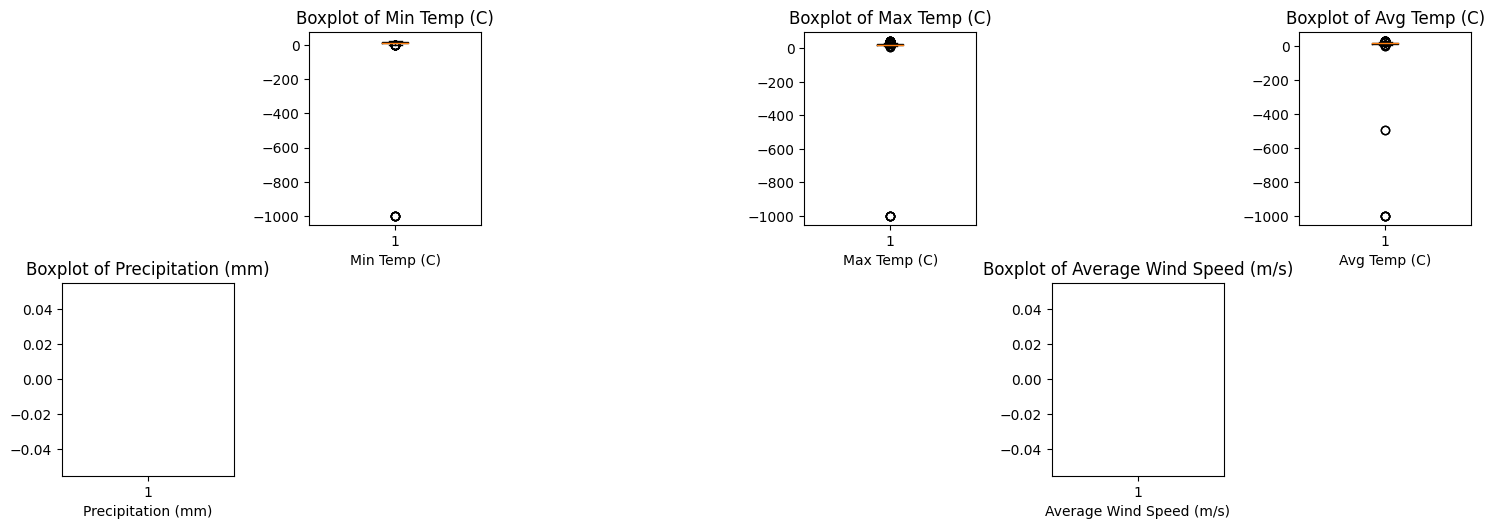

In [ ]:
boxplot_col = ['Min Temp (C)', 'Max Temp (C)', 'Avg Temp (C)', 'Precipitation (mm)', 'Average Wind Speed (m/s)']

plt.figure(figsize = (15,15))
for column in boxplot_col:
    plt.subplot(6,6, list(weatherData_cleaned.columns).index(column) + 1)
    plt.boxplot(weatherData_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [ ]:
# taking out outliers
weatherData_cleaned = weatherData_cleaned[(weatherData_cleaned['Min Temp (C)'] >= -990) &
                                          (weatherData_cleaned['Max Temp (C)'] >= -990) &
                                          (weatherData_cleaned['Avg Temp (C)'] >= -990) &
                                          (weatherData_cleaned['Precipitation (mm)'] >= -990) &
                                          (weatherData_cleaned['Average Wind Speed (m/s)'] >= -990)]

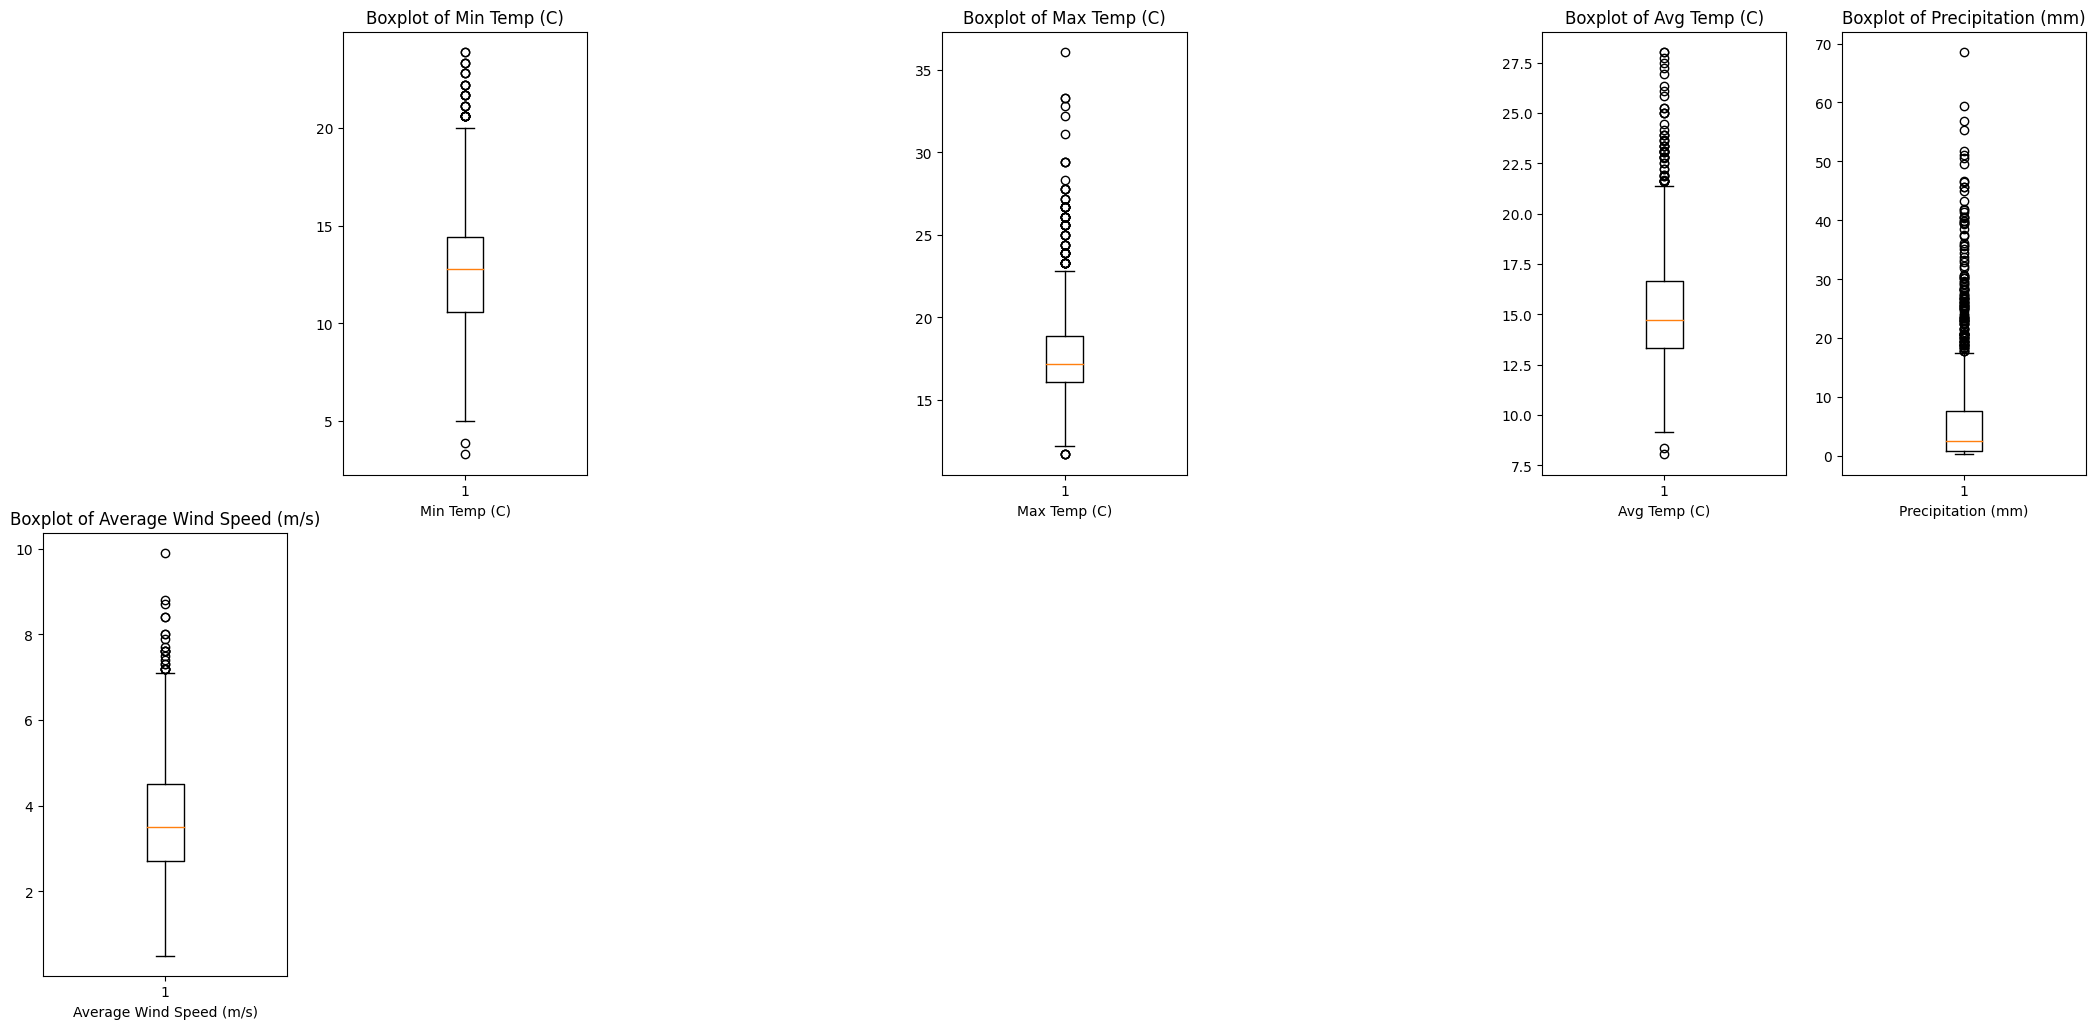

In [ ]:
# checking box plots again
plt.figure(figsize = (30,25))
for column in boxplot_col:
    plt.subplot(5,10, list(weatherData_cleaned.columns).index(column) + 1)
    plt.boxplot(weatherData_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

We can see that the Min Temp, the Average wind Speed, and the max temp are almost fairly normal. The median value for the Average wind speed and max temp is closer to the lower end of the IQR, while the Min Temp median is closer to the higher end of IQR. The Average temp IQR is leaning a little towards the first quartile meaning there is a slight right skewed distribution. Precipitation IQR is heavily leaning towards the Q1 so it has a big right skewed distribution.

In [ ]:
weatherData_cleaned.isnull().sum()

Date                            0
Min Temp (C)                    0
Min Temp S Flag                 0
Max Temp (C)                    0
Max Temp S Flag                 0
Avg Temp (C)                    0
Precipitation (mm)              0
Precipitation M Flag         1410
Precipitation Q Flag         1410
Precipitation S Flag            0
Average Wind Speed (m/s)        0
Average Wind Speed S Flag       0
dtype: int64

## OpenWeather API: Daily Temperature Data

In [2]:
# Make API call to OpenWeather for San Diego lat & long
latitude_SD = 32.715736
longitude_SD = -117.161087

url = f'https://api.openweathermap.org/data/3.0/onecall?lat={latitude_SD}&lon={longitude_SD}&appid=1024bc200ad2448da47e940dcfe0a5d9'
response = requests.get(url)

if response.status_code == 200:
  data = response.json()
else:
  print('Error:', response.status_code)

In [3]:
# Get only today's averages data
data.get('daily')[0]

{'dt': 1706731200,
 'sunrise': 1706712260,
 'sunset': 1706750376,
 'moonrise': 1706770500,
 'moonset': 1706723460,
 'moon_phase': 0.68,
 'summary': 'There will be partly cloudy today',
 'temp': {'day': 290.78,
  'min': 287.05,
  'max': 290.97,
  'night': 287.87,
  'eve': 287.42,
  'morn': 288.33},
 'feels_like': {'day': 290.17, 'night': 287.36, 'eve': 287.07, 'morn': 287.84},
 'pressure': 1015,
 'humidity': 60,
 'dew_point': 282.14,
 'wind_speed': 4.2,
 'wind_deg': 214,
 'wind_gust': 6.23,
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'clouds': 90,
 'pop': 0,
 'uvi': 4.37}

In [7]:
# Get data points to put into CSV
data_to_append = {k: data.get('daily')[0][k] for k in ['dt', 'sunrise', 'sunset', 'humidity', 'uvi', 'wind_speed']}
data_to_append['temp'] = data.get('daily')[0].get('temp').get('day')
data_to_append

{'dt': 1706731200,
 'sunrise': 1706712260,
 'sunset': 1706750376,
 'humidity': 60,
 'uvi': 4.37,
 'wind_speed': 4.2,
 'temp': 290.78}

In [5]:
# Def to write to csv (append if exists)
def write_to_csv(data):
    file_exists = os.path.isfile('weather_data.csv')
    with open('weather_data.csv', 'a', newline='') as csvfile:
        fieldnames = ['dt', 'sunrise', 'sunset', 'humidity', 'uvi', 'temp']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        if not file_exists:
            writer.writeheader()  # Write header only once

        writer.writerow(data)

In [6]:
# Append to CSV if exists or write new one if doesn't - can run this every morning with a cron job
write_to_csv(data_to_append)

## National Weather Service API - Daily Alerts

In [11]:
api_connector.set_user_agent("Application Name", "youremail@domain.com")
server_ping = api_connector.ping_server()

# Always a good idea to check to make sure an error didn't occur.
# There are times when a 400 or 500 error will occur.
if server_ping.has_any_request_errors:
    raise ConnectionError(server_ping['detail'])
else:
    print(server_ping.status)  # will print OK

OK


In [12]:
api_connector.set_user_agent("NWSAPy", "your_email@email.com or website")
CA_Alert = api_connector.get_alert_by_area('CA')

In [14]:
df = CA_Alert.to_df()
df.columns

Index(['@id', '@type', 'affectedZones', 'affected_zones', 'areaDesc',
       'area_desc', 'category', 'certainty', 'description', 'effective',
       'effective_utc', 'ends', 'ends_utc', 'event', 'expires', 'expires_utc',
       'geocode', 'headline', 'id', 'instruction', 'messageType',
       'message_type', 'onset', 'onset_utc', 'parameters', 'points', 'polygon',
       'references', 'response', 'sender', 'senderName', 'sender_name', 'sent',
       'sent_utc', 'severity', 'status', 'urgency'],
      dtype='object')

In [15]:
df

,@id,@type,affectedZones,affected_zones,areaDesc,area_desc,category,certainty,description,effective,...,references,response,sender,senderName,sender_name,sent,sent_utc,severity,status,urgency
0,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,"[https://api.weather.gov/zones/county/CAC033, ...","[CAC033, CAC045, CAC105]","Lake, CA; Mendocino, CA; Trinity, CA","[Lake, CA, Mendocino, CA, Trinity, CA]",Met,Likely,* WHAT...Flooding caused by excessive rainfall...,2024-01-31 18:29:00-08:00,...,[{'@id': 'https://api.weather.gov/alerts/urn:o...,Avoid,w-nws.webmaster@noaa.gov,NWS Eureka CA,NWS Eureka CA,2024-01-31 18:29:00-08:00,2024-02-01 02:29:00+00:00,Minor,Actual,Expected
1,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,"[https://api.weather.gov/zones/county/CAC075, ...","[CAC075, CAC081]","San Francisco, CA; San Mateo, CA","[San Francisco, CA, San Mateo, CA]",Met,Likely,* WHAT...Urban and small stream flooding cause...,2024-01-31 18:17:00-08:00,...,[],Avoid,w-nws.webmaster@noaa.gov,NWS San Francisco CA,NWS San Francisco CA,2024-01-31 18:17:00-08:00,2024-02-01 02:17:00+00:00,Minor,Actual,Expected
2,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,"[https://api.weather.gov/zones/county/CAC023, ...","[CAC023, CAC105]","Humboldt, CA; Trinity, CA","[Humboldt, CA, Trinity, CA]",Met,Likely,* WHAT...Flooding caused by excessive rainfall...,2024-01-31 18:08:00-08:00,...,[],Avoid,w-nws.webmaster@noaa.gov,NWS Eureka CA,NWS Eureka CA,2024-01-31 18:08:00-08:00,2024-02-01 02:08:00+00:00,Minor,Actual,Expected
3,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,"[https://api.weather.gov/zones/county/CAC041, ...","[CAC041, CAC097]","Marin, CA; Sonoma, CA","[Marin, CA, Sonoma, CA]",Met,Likely,* WHAT...Flooding caused by excessive rainfall...,2024-01-31 17:57:00-08:00,...,[],Avoid,w-nws.webmaster@noaa.gov,NWS San Francisco CA,NWS San Francisco CA,2024-01-31 17:57:00-08:00,2024-02-01 01:57:00+00:00,Minor,Actual,Expected
4,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,[https://api.weather.gov/zones/forecast/CAZ334...,"[CAZ334, CAZ335, CAZ336]",Tehachapi; Grapevine; Frazier Mountain Communi...,"[Tehachapi, Grapevine, Frazier Mountain Comm...",Met,Likely,* WHAT...Southeast winds 25 to 35 mph with gus...,2024-01-31 17:35:00-08:00,...,[{'@id': 'https://api.weather.gov/alerts/urn:o...,Prepare,w-nws.webmaster@noaa.gov,NWS Hanford CA,NWS Hanford CA,2024-01-31 17:35:00-08:00,2024-02-01 01:35:00+00:00,Severe,Actual,Expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,[https://api.weather.gov/zones/forecast/CAZ567],[CAZ567],Imperial Valley,[Imperial Valley],Met,Unknown,The Imperial County APCD has declared a mandat...,2024-01-31 09:31:00-07:00,...,[],Monitor,w-nws.webmaster@noaa.gov,NWS Phoenix AZ,NWS Phoenix AZ,2024-01-31 09:31:00-07:00,2024-01-31 16:31:00+00:00,Unknown,Actual,Unknown
60,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,[https://api.weather.gov/zones/forecast/CAZ353],[CAZ353],Santa Barbara County Interior Mountains,[Santa Barbara County Interior Mountains],Met,Likely,* WHAT...Southeast winds 30 to 40 mph with gus...,2024-01-31 03:08:00-08:00,...,[{'@id': 'https://api.weather.gov/alerts/urn:o...,Prepare,w-nws.webmaster@noaa.gov,NWS Los Angeles/Oxnard CA,NWS Los Angeles/Oxnard CA,2024-01-31 03:08:00-08:00,2024-01-31 11:08:00+00:00,Severe,Actual,Expected
61,https://api.weather.gov/alerts/urn:oid:2.49.0....,wx:Alert,[https://api.weather.gov/zones/forecast/CAZ350...,"[CAZ350, CAZ352]",Santa Barbara County Southeastern Coast; Santa...,"[Santa Barbara County Southeastern Coast, San...",Met,Likely,* WHAT...Southeast winds 20 to 25 mph with gus...,2024-01-31 03:08:00-08:00,...,[{'@id': 'https://api.weather.gov/alerts/urn:o...,Execute,w-nws.webmaster@noaa.gov,NWS Los Angeles/Oxnard CA,NWS Los Angeles/Oxnard CA,2024-01-31 03:08:00-08:00,2024-01-31 11:08:00+00:00,Moderate,Actual,Expected
6